Polynomial regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
%matplotlib inline

Download the Data

In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2021-03-14 09:36:11--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2021-03-14 09:36:11 (1.89 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



Understanding the Data

FuelConsumption.csv

We have downloaded fuelconsumption dataset,FuelConsumption.CSV which contain model specific fuel specific ratings and estimated carbondioxide emissions 
for new light duty vehciles for retail sale  in Canada

MODEL YEAR e.g. 2007

MAKE e.g.Acura

MODEL e.g.ILX

VEHICLE CLASS e.g. SUV

ENGINESIZE e.g.4.7

CYLINDERS e.g.6

TRANSMISSION e.g A6

FUEL CONSUMPTION in CITY(L/100KM) e.g.9.9

FUEL CONSUMPTION in HWY(L/100KM) e.g. 8.9

FUEL CONSUMPTION COMB(L/100KM) e.g.9.2

CO2 EMISSIONS(g/km) e.g. 182 -->low --> 0

Reading the data in 

In [3]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Lets select some features that we want to use for regression

In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Lets plot emission values with respect to engine size

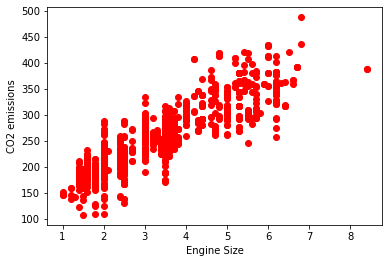

In [6]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color = 'red')
plt.xlabel('Engine Size')
plt.ylabel("CO2 emissions")
plt.show()

creating train and test data set

Train/Test split involves splitting the dataset into training and testing sets respectively,which are mutually exclusive.After which you train with the
training set and test with the testing set.

In [8]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [11]:
train.shape


(862, 4)

In [12]:
test.shape

(205, 4)

In [ ]:
Polynomial Regression